In [374]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing 
from math import radians, cos, sin, asin, sqrt

In [375]:
def haversine(x, y):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    #lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    lon1, lat1 = map(radians, x)
    lon2, lat2 = map(radians, y)
    
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371000 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [376]:
df = pd.read_csv('city_data.csv')
df.head()

,name,longitude,latitude,population
0,Kota Cilegon,106.040506,-6.016983,431305
1,Kabupaten Pandeglang,106.103897,-6.314835,1209011
2,Kabupaten Serang,106.150299,-6.120090,1501501
3,Kota Serang,106.150299,-6.120090,677804
4,Kabupaten Lebak,106.252214,-6.564396,1295810


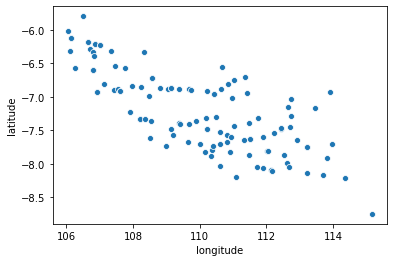

In [377]:
sns.scatterplot(x='longitude',y='latitude',data=df)

## Basic K-means algorithm.
1. Select K points as initial centroids.
2. repeat
    1. form K clusters by assigning each point to its closest centroid.
    2. Recompute the centroid of each cluster.
5. until Centroids do not change

In [381]:
def assign(city,centroids):
    min_dist = math.inf

    for i in range(len(centroids)):
        dist = haversine(city,centroids[i])
        
        if dist < min_dist:
            min_dist = dist
            c = i
    return c

In [431]:
def weightedKmeans(data ,weights,k,iteration):
    X = data
    y = weights
    #Select k initial centroids
    idx = [ np.random.randint(0,len(X)-1) for i in range(k)]
    centroids=X[idx,:]
    old_centroids = centroids

    for i in range(iteration):
        print('Iteration no:',i+1)

        labels=[]
        #Assign each point to its closest centroid
        for city,population in zip(X,y):
            labels.append(assign(city,centroids))
        labels = np.asarray(labels,dtype='int64')

        #Calculate new centroid based on mean of all datapoints
        centroids = np.array([np.average(X[labels == i],weights=y[labels== i],axis=0) for i in range(k)])

        if (centroids == old_centroids).all():
            print('Converged!!')
            return labels, centroids
        
        old_centroids = centroids
    print("Not converged!Try with more iterations")
    return labels, centroids

## Finding the location of Warehouses based on weighted K Means

#### We take the population of each city into consideration

Iteration no: 1
Iteration no: 2
Iteration no: 3
Iteration no: 4
Iteration no: 5
Iteration no: 6
Iteration no: 7
Iteration no: 8
Iteration no: 9
Converged!!
Warehouse 1 : LAT = 110.65488652357402, LONG = -7.3190666883404125
Warehouse 2 : LAT = 106.94565950274504, LONG = -6.458596665648387
Warehouse 3 : LAT = 108.79249862879917, LONG = -7.107564107039147
Warehouse 4 : LAT = 112.32219303538395, LONG = -7.635277540631421
Warehouse 5 : LAT = 113.87512768802331, LONG = -7.935125775183536


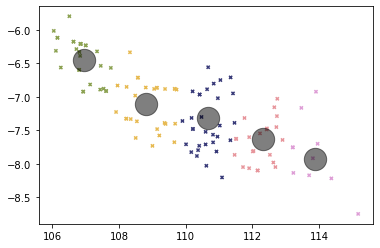

In [436]:
data = np.array(df.drop(['name','population'],axis=1))
population = np.array(df['population'])
labels , centroids = weightedKmeans(data=data, weights=population,k=5,iteration=20)

plt.scatter(data[:,0], data[:,1], c=labels,s=10,cmap='tab20b',marker='x')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=500, alpha=0.5);

for index,coord in enumerate(centroids):
    print("Warehouse {} : LAT = {}, LONG = {}".format(index+1,coord[0],coord[1]))

## Finding the location of Warehouses based on non weighted K Means

####  Population of the cities are not taken into consideration

Iteration no: 1
Iteration no: 2
Iteration no: 3
Iteration no: 4
Iteration no: 5
Iteration no: 6
Iteration no: 7
Iteration no: 8
Iteration no: 9
Iteration no: 10
Iteration no: 11
Iteration no: 12
Iteration no: 13
Iteration no: 14
Converged!!
Warehouse 0 : LAT = 107.30101948048785, LONG = -6.613449590243901
Warehouse 1 : LAT = 110.19926242, LONG = -7.318695757777775
Warehouse 2 : LAT = 112.67557866969696, LONG = -7.723049087878787


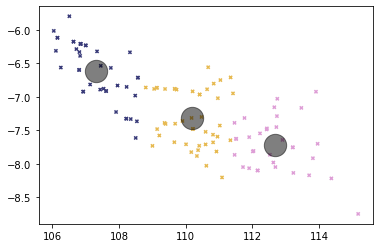

In [434]:
dummy_weigths = np.ones((data.shape[0]))
labels , centroids = weightedKmeans(data=data, weights=dummy_weigths,k=5,iteration=20)

plt.scatter(data[:,0], data[:,1], c=labels,s=10,cmap='tab20b',marker='x')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=500, alpha=0.5);

for index,coord in enumerate(centroids):
    print("Warehouse {} : LAT = {}, LONG = {}".format(index,coord[0],coord[1]))

## Conclusion

We find that the location of some of the warehouses change when we take the population of each city in factor while calculating the centroids of each cluster